In [ ]:
pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.compose import make_column_transformer

########### mflow ############
import mlflow
import mlflow.sklearn
########### mflow ############

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sharelib import *
import logging
from pathlib import Path
import json
import glob
import sys

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [2]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata3' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)

xcount:  1


In [17]:
    np.set_printoptions(threshold=sys.maxsize)
    
    # df_categories = pd.concat([df["ads_country_dst"]], axis=1, sort=False,)

    df_categories = df[df["ads_country_dst"] != '10.0.0.0-10.255.255.255']
    df_categories = pd.concat([df_categories["ads_country_dst"]], axis=1, sort=False,)
    # print(df_categories.columns)
    # print(df_categories.shape)
    # print(df_categories)
    
    countryStr = listOfCountryDst()
    df_categories = df_categories.mask(~df_categories.isin(countryStr),'OTHER')
    # print(df_categories.columns)
    # print(df_categories.shape)
    # print(df_categories)

    # X_label = df_categories.apply(LabelEncoder().fit_transform)
    # print(X_label)
    # print(type(X_label))
    # X = pd.concat([X_label], axis=1, sort=False,)
    # # print(X)
    # print(type(X))
    # print(X.value_counts())

    X_transform = createXTransformDst2()
    print(X_transform)
    print(type(X_transform))
    # # X_transform.set_output(transform="pandas")
    # X_label = df_categories.apply(X_transform.fit_transform)
    # print(X_label)
    # print(type(X_label))
    X = X_transform.transform(df_categories)
    print(X)
    print(type(X))
    
    print(X_transform.categories_)
    print(X_transform.inverse_transform([[ 158 ]]))

    # X = pd.concat([X], axis=1, sort=False,)
    # print(X)
    # print(type(X))
    


166
166
OrdinalEncoder()
<class 'sklearn.preprocessing._encoders.OrdinalEncoder'>
       ads_country_dst
6                158.0
16               158.0
27               158.0
35                15.0
37                15.0
...                ...
10019            108.0
10024            158.0
10026            108.0
10033            158.0
10038            148.0

[1610 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
[array(['10.0.0.0-10.255.255.255', '100.64.0.0-100.127.255.255',
       '169.254.0.0-169.254.255.255', '172.16.0.0-172.31.255.255',
       '192.168.0.0-192.168.255.255', 'Afghanistan', 'Albania', 'Algeria',
       'Angola', 'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia Pacific Region', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bermuda', 'Bolivia Plurinational State Of',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'CT

In [4]:
# Call and fit the Local Outlier Factor detector
lof_detector = LocalOutlierFactor(n_neighbors=10, contamination=0.01,novelty=True).fit(X)
lof_detect = lof_detector.predict(X)
print(lof_detect)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

C:\Users\sutee.k\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


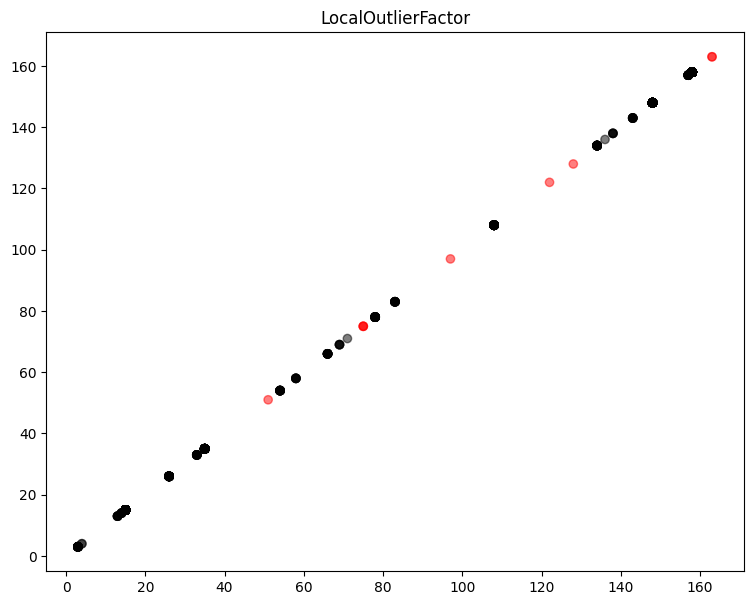

In [5]:
plt.figure(figsize=(9,7))
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 0], c=lof_detect, cmap="flag", alpha=0.5)
plt.title("LocalOutlierFactor")
plt.show()

In [13]:
print(X[35:36 :])
print(X[X == 158])
print(lof_detector.predict(X[35:36 :]))
print(lof_detector.predict(X))

     ads_country_dst
234            157.0
       ads_country_dst
6                158.0
16               158.0
27               158.0
35                 NaN
37                 NaN
...                ...
10019              NaN
10024            158.0
10026              NaN
10033            158.0
10038              NaN

[1610 rows x 1 columns]
[1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

C:\Users\sutee.k\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\sutee.k\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [7]:
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000
tracking_uri = os.environ["MLFLOW_TRACKING_URI"]
# export MLFLOW_TRACKING_USERNAME=user 
# export MLFLOW_TRACKING_PASSWORD=pwd

experiment = mlflow.get_experiment_by_name('soc-ml-LocalOutlierFactor')
experiment_id = experiment.experiment_id

with mlflow.start_run(experiment_id=experiment_id):
    mlflow.set_tracking_uri(tracking_uri)
    
    print("Artifact Location: {}".format(experiment.artifact_location))
    print("artifact uri : " + mlflow.get_artifact_uri())

    mlflow.doctor()

    # mlflow.log_metric("score_trains", str(score_train))
    # mlflow.log_metric("score_test", str(score_test))
    mlflow.sklearn.log_model(lof_detector, "model", registered_model_name="soc-ml")
    print("Model saved in run %s" % mlflow.active_run().info.run_uuid)

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000
Artifact Location: mlflow-artifacts:/394149324160139362
artifact uri : mlflow-artifacts:/394149324160139362/8607316d54e5400ca1b9b4380a351839/artifacts
System information: Windows 10.0.19045
Python version: 3.9.7
MLflow version: 2.1.1
MLflow module location: C:\Users\sutee.k\AppData\Roaming\Python\Python39\site-packages\mlflow\__init__.py
Tracking URI: http://127.0.0.1:5000
Registry URI: http://127.0.0.1:5000
Active experiment ID: 394149324160139362
Active run ID: 8607316d54e5400ca1b9b4380a351839
Active run artifact URI: mlflow-artifacts:/394149324160139362/8607316d54e5400ca1b9b4380a351839/artifacts
MLflow environment variables: 
  MLFLOW_TRACKING_URI: http://127.0.0.1:5000
MLflow dependencies: 
  Flask: 2.3.3
  Jinja2: 3.1.2
  alembic: 1.12.0
  click: 8.1.7
  cloudpickle: 2.2.1
  databricks-cli: 0.17.8
  docker: 6.1.3
  entrypoints: 0.4
  gitpython: 3.1.37
  importlib-metadata: 5.2.0
  markdown: 3.4.4
  matplotlib: 3.8.0
  numpy: 1.25.2
  

Registered model 'soc-ml' already exists. Creating a new version of this model...
2023/10/04 00:52:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: soc-ml, version 20


Model saved in run 8607316d54e5400ca1b9b4380a351839


Created version '20' of model 'soc-ml'.


In [11]:
!mlflow models serve -m mlflow-artifacts:/394149324160139362/8607316d54e5400ca1b9b4380a351839/artifacts/model -p 1234 --no-conda

^C


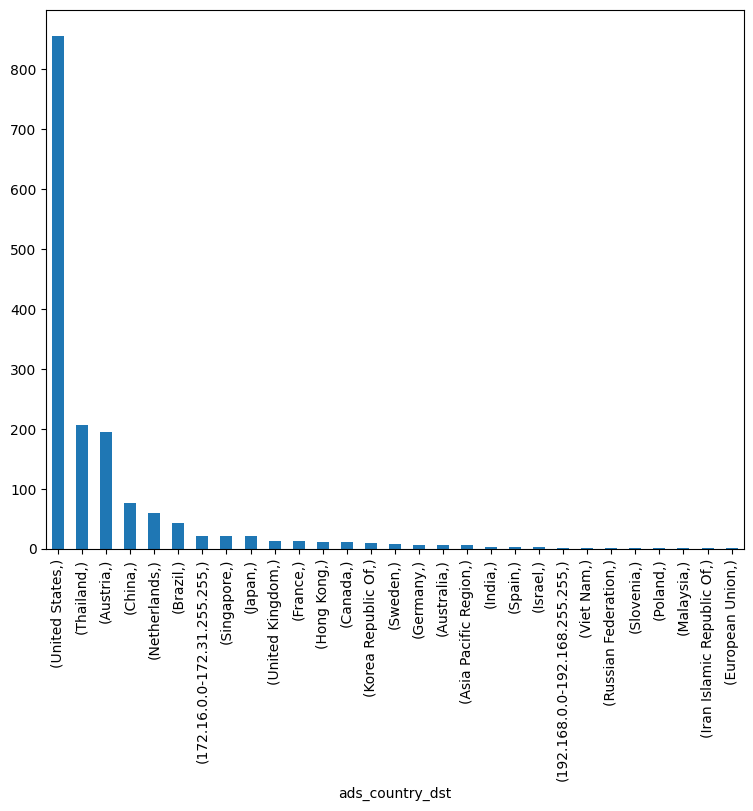

In [8]:
# Plot the conparison between actual and predicted y
df_categories.value_counts()[: :].plot(kind="bar", figsize=(9,7))
plt.show()